Выполнила: Анастасия Растворова

Сборки: ASM906v1, ASM1380v1, ASM83427v1, ASM83431v1, ASM83492v1, ASM83498v1, ASM118879v1, ASM118881v1, ASM929594v1, ASM929596v1
Я скачивала полные хромосомы, производя поиск по Assembly в NCBI.

<b>1. Команды, подаваемые в Sibilia:</b>

Sibelia -s loose C:\Users\Mi\Documents\ngs\task_Bochkareva\yersinia_pestis.fasta -o C:\Users\Mi\Documents\ngs\task_Bochkareva\5kb

Sibelia -s loose -a C:\Users\Mi\Documents\ngs\task_Bochkareva\yersinia_pestis.fasta -o C:\Users\Mi\Documents\ngs\task_Bochkareva\5kb_common

Sibelia -s loose C:\Users\Mi\Documents\ngs\task_Bochkareva\yersinia_pestis.fasta -o C:\Users\Mi\Documents\ngs\task_Bochkareva\1kb -m 1000

Sibelia -s loose -a C:\Users\Mi\Documents\ngs\task_Bochkareva\yersinia_pestis.fasta -o C:\Users\Mi\Documents\ngs\task_Bochkareva\1kb_common -m 1000

Sibelia -s fine C:\Users\Mi\Documents\ngs\task_Bochkareva\yersinia_pestis.fasta -o C:\Users\Mi\Documents\ngs\task_Bochkareva\1kb_fine -m 1000

Sibelia -s fine -a C:\Users\Mi\Documents\ngs\task_Bochkareva\yersinia_pestis.fasta -o C:\Users\Mi\Documents\ngs\task_Bochkareva\1kb_fine_common -m 1000

    5kb 83
    5kb_common 0
    1kb 167
    1kb_common 0 
    1kb_fine 186
    1kb_fine_common 0

2. Общих блоков, которые встречались бы у всех сборок по одному разу не было найдено, поэтому изображений тоже нет. Но блоки, содержащиеся во всех сборках с повторами, присутствуют, как минимум 4 я нашла. Также есть много блоков, в которых отстутствует какая-то одна из сборок. 

Блоки с повторами я посчитала далее, их 16 штук.

Результат для 5kb свмый низкий, так как длинные общие последовательности встречаются реже коротких. Больше всего результатов для запуска в режиме <i>fine</i>, так как он менее точный и берет более которткие блоки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

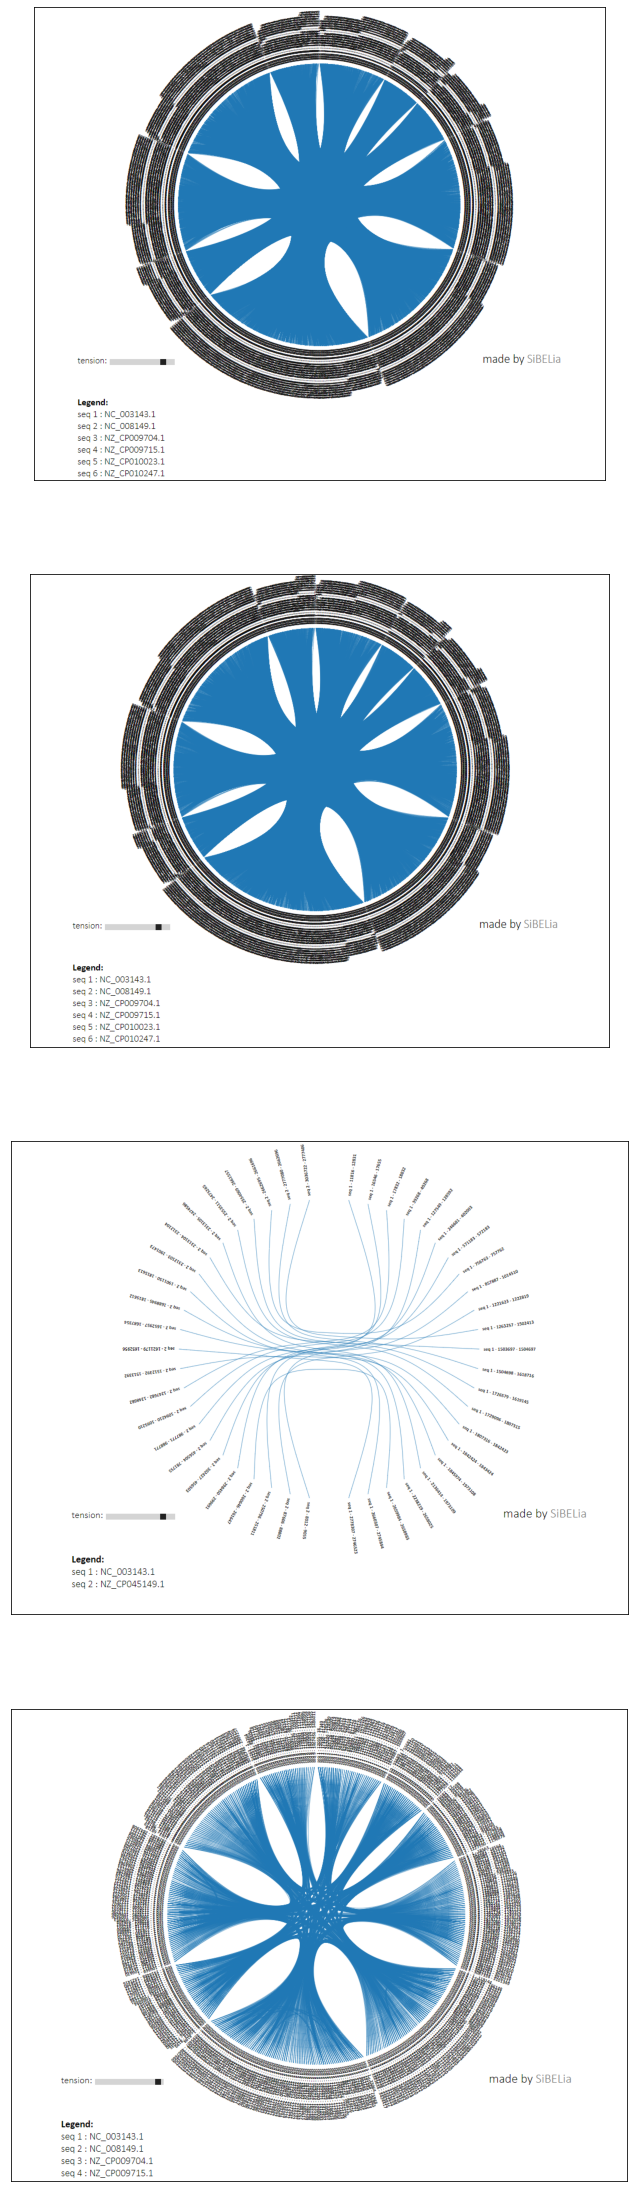

In [7]:
fig, axes = plt.subplots(4, 1)

axes[0].imshow(plt.imread('C:/Users/Mi/Documents/ngs/task_Bochkareva/hw Rastvorova/1kb.png'))
axes[1].imshow(plt.imread('C:/Users/Mi/Documents/ngs/task_Bochkareva/hw Rastvorova/1kb_fine.png'))
axes[2].imshow(plt.imread('C:/Users/Mi/Documents/ngs/task_Bochkareva/hw Rastvorova/1kb_most_distant.png'))
axes[3].imshow(plt.imread('C:/Users/Mi/Documents/ngs/task_Bochkareva/hw Rastvorova/5kb.png'))

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

fig.set_figwidth(20) 
fig.set_figheight(40) 

plt.show()

Перевожу файл выдачи Sibelia для трешхолда в 1kb в датафрейм.

In [2]:
count_lines = 0
with open('C:/Users/Mi/Documents/ngs/task_Bochkareva/1kb/blocks_coords.txt') as data:
    full_file = data.read().splitlines()

full_file = full_file[12:]
header = str(full_file[0][:5] + '\t' + full_file[1])
print(header)

name_block = str()
dataset = []
for line in full_file:
    if 'Block' in line:
        name_block = line[7:]
    else:
        while line != '--------------------------------------------------------------------------------':
            if line == 'Seq_id\tStrand\tStart\tEnd\tLength':
                break
            else:
                data_line = str(name_block + '\t'+ line)
                dataset.append(data_line.split('\t'))
                break
print(len(dataset))

Block	Seq_id	Strand	Start	End	Length
1221


In [3]:
blocks = pd.DataFrame(np.array(dataset), columns=header.split('\t'))
blocks.shape

(1221, 6)

3. Не уверена, что правильно поняла, как строить график, но исходила из формулировки "y – length, x – frequency". Поэтому я  для каждого блока создала набор уникальных длин последовательностей (ось y) и посчитала, сколько раз каждая из них встречалась (ось x).

In [4]:
blocks_ids = blocks.Block.unique()
lens_in_block = []
num_in_block = []
freq_in_block = []
for i in blocks_ids:
    lens_in_block.append(list(blocks[blocks.Block == i].Length.unique()))
    num_in_block.append(len(blocks[blocks.Block == i].Length))
    for x in lens_in_block[-1]:
        freq_in_block.append(sum(blocks[blocks.Block == i].Length == x))
lens_in_block_list = [int(item) for sublist in lens_in_block for item in sublist]
len(lens_in_block_list) == len(freq_in_block)

True

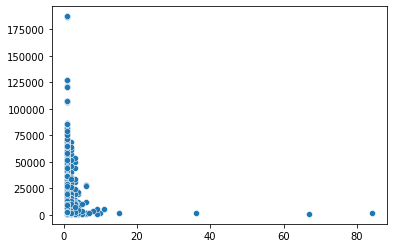

In [5]:
plot = sns.scatterplot(x=freq_in_block, y=lens_in_block_list)

На графике присутствуют выбросы и по частоте, и по длине последовательности в блоке.

In [6]:
repeated_blocks = 0
for i in blocks_ids:
    if len(blocks[blocks.Block == i].Seq_id) != len(blocks[blocks.Block == i].Seq_id.unique()):
        repeated_blocks += 1
print('repeated blocks', repeated_blocks)

repeated blocks 16


4. С поиском самых длинных общих блоков и самых длинных редких (longest common block and the longest rare block) я запуталась. И не очень поняла, что именно мы должны искать в аннотации к этим сборкам, поэтому это задание я не выполнила, но постаралась найти самые длинные последовательности.

In [7]:
blocks[blocks.Length == str(max(lens_in_block_list))]

,Block,Seq_id,Strand,Start,End,Length
1200,159,9,+,1248748,1436210,187463


Самый длинный фрагмент относится не к самому редкому блоку.

In [8]:
tmp_id = int(blocks[blocks.Length == str(max(lens_in_block_list))].Block)
blocks[blocks.Block == str(tmp_id)]

,Block,Seq_id,Strand,Start,End,Length
1198,159,5,+,1449081,1635650,186570
1199,159,8,+,225130,412481,187352
1200,159,9,+,1248748,1436210,187463


In [9]:
indices = [i for i, x in enumerate(num_in_block) if x == min(num_in_block)]
indices = [str(i+1) for i in indices]
blocks.loc[blocks.Block.isin(indices)]

,Block,Seq_id,Strand,Start,End,Length
1140,139,3,-,632394,630490,1905
1141,139,8,-,1076699,1074795,1905
1157,145,5,-,3650187,3647907,2281
1158,145,8,+,2413288,2415568,2281
1213,164,4,+,2740223,2774576,34354
1214,164,5,-,2695202,2660849,34354
1215,165,4,+,2776036,2840965,64930
1216,165,5,-,2660712,2595817,64896
1217,166,4,-,3054291,3052393,1899
1218,166,5,+,2064456,2066354,1899


Самый длинный редкий блок №165.

In [10]:
commons = [1, 2, 4, 5]
commons = [str(i) for i in commons]
tmp_max_com = max(blocks[blocks.Block.isin(commons)].Length)
blocks[blocks.Length == tmp_max_com]

,Block,Seq_id,Strand,Start,End,Length
304,4,9,-,299375,293902,5474


<i>commons</i> - это вручную найденные общие последовательности из выдачи Sibelia.
Самая длинная общая последовательность в блоке №4. Но если брать по количеству, скорее всего, самый длинный в общем будет блок №1.

5. Создаём heatmap. Делаем матрицу, подсчитывая количество общих блоков.

In [11]:
seq_ids = blocks.Seq_id.unique()
dist_matr = []
dist_matr_relative = []
for i in seq_ids:
    i_blocks = blocks[blocks.Seq_id == i].Block.unique()
    dist_set = []
    for j in seq_ids:
        j_blocks = blocks[blocks.Seq_id == j].Block.unique()
        common = len(list(set(i_blocks) & set(j_blocks)))
        dist_set.append(common)
    dist_matr.append(dist_set)

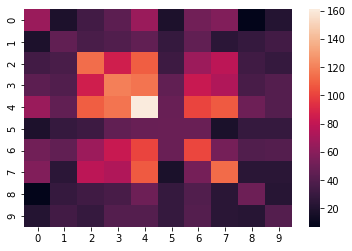

In [12]:
ab = sns.heatmap(dist_matr)

In [13]:
min_x = dist_matr.index(min(dist_matr)) + 1
min_y = str(dist_matr[min_x].index(min(dist_matr[min_x])) + 1)
min_x = str(min_x)
print("The most distant genomes are #", min_x, "and #", min_y)

The most distant genomes are # 9 and # 1


6. Поскольку у меня нет блоков, общих для всеx сборок, я отдельно прогнала в Sibelia две самые дальние последовательности, чтобы выполнить рекнструкция сценария инверсии.

Sibelia -s loose -a C:\Users\Mi\Documents\ngs\task_Bochkareva\most_distant_genomes.fasta -o C:\Users\Mi\Documents\ngs\task_Bochkareva\most_distant_genomes -m 1000

In [14]:
with open('C:/Users/Mi/Documents/ngs/task_Bochkareva/most_distant_genomes/genomes_permutations.txt') as file:
    for line in file:
        print(line.replace("+", ""))

>NC_003143.1

23 20 18 1 11 7 15 6 9 19 12 8 13 -3 21 2 10 17 -16 14 -5 4 -22 $

>NZ_CP045149.1

11 19 23 5 20 7 9 15 1 18 10 22 2 17 -4 -14 -8 16 -21 3 -6 -13 -12 $



Результаты GRIMM, в приложении к ДЗ.
Самая длинная инверсия 17 генов.

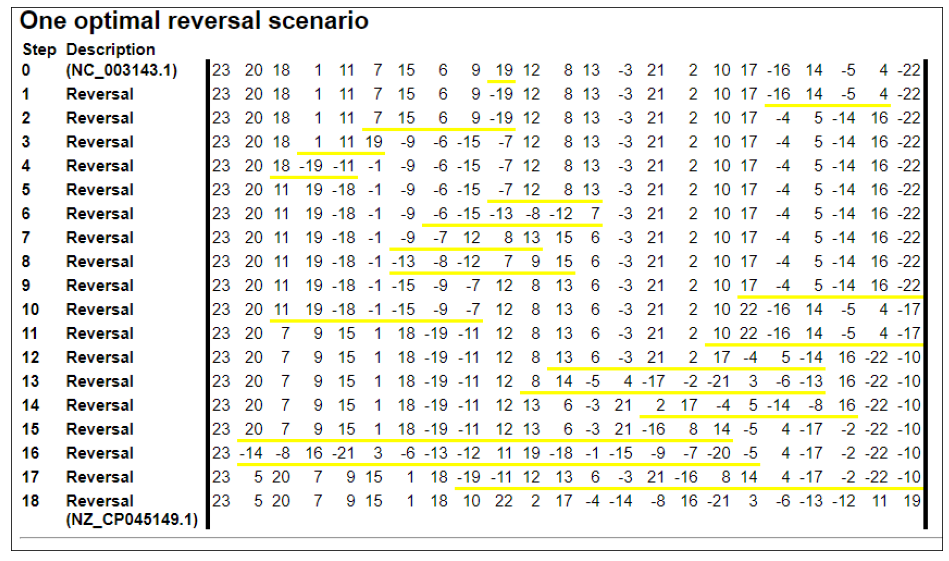

In [15]:
plt.figure(figsize=(20, 10))
plt.imshow(plt.imread('C:/Users/Mi/Documents/ngs/task_Bochkareva/GRIMM.png'))

plt.xticks([])
plt.yticks([])

plt.show()

Результаты YASS.

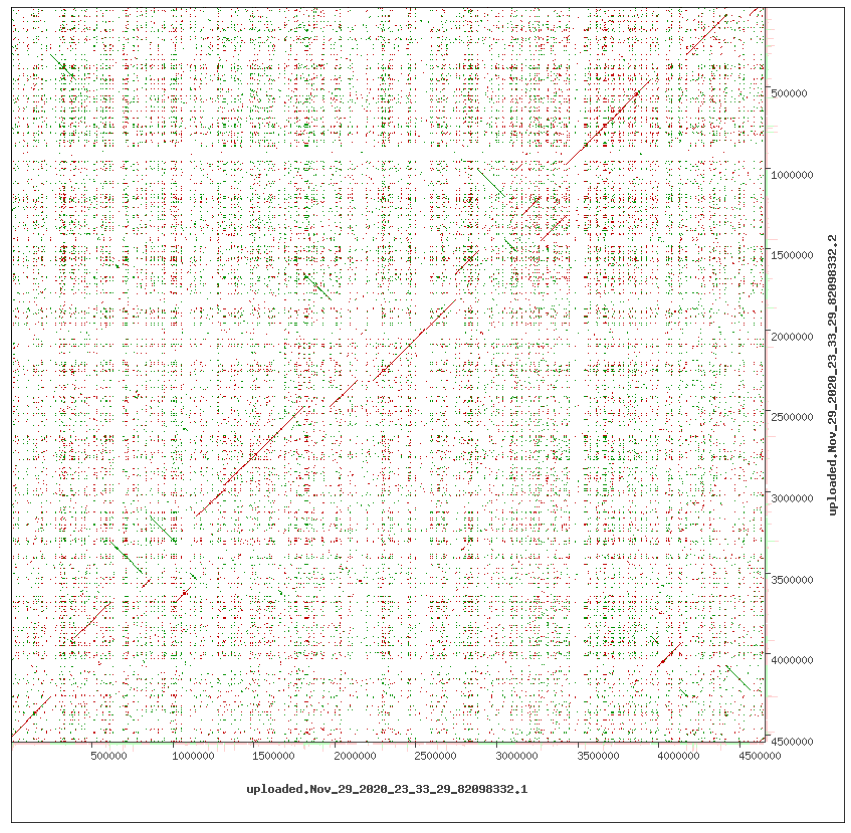

In [16]:
plt.figure(figsize=(15, 15))
plt.imshow(plt.imread('C:/Users/Mi/Documents/ngs/task_Bochkareva/YASS.png'))

plt.xticks([])
plt.yticks([])

plt.show()